In [1]:
# Freeing CUDA memory: https://stackoverflow.com/questions/55322434/how-to-clear-cuda-memory-in-pytorch 
import torch 
from VRP_Net_L import VRPNet_L 
from matplotlib import pyplot as plt 
from utils import * 
import os 
import matplotlib.pyplot as plt 
from torchinfo import summary 
import numpy as np 
from inference import inference 
from pathlib import Path 
import time
from tqdm import tqdm

In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu') 

print("Running on: " , device) 

num_facilities = np.linspace(10,200,20) # number of facilities 

city_dim = 2
Data_1 = []
Data_2 = []
Data_3 = []
Data_4 = []
for i in num_facilities:
    i = int(i)
    # data = torch.tile(torch.rand(i, city_dim), (1, 1, 1)).to(device) # 1 drone
    data = torch.rand(1,i,city_dim).to(device) # 1 drone
    Data_1.append(data)
    # data = torch.tile(torch.rand(i, city_dim), (50, 1, 1)).to(device) # 50 drones
    data = torch.rand(50,i,city_dim).to(device) # 50 drones
    Data_2.append(data)
    # data = torch.tile(torch.rand(i, city_dim), (100, 1, 1)).to(device) # 100 drones
    data = torch.rand(100,i,city_dim).to(device) # 100 drones
    Data_3.append(data)
    # data = torch.tile(torch.rand(i, city_dim), (200, 1, 1)).to(device) # 100 drones
    data = torch.rand(200,i,city_dim).to(device) # 200 drones
    Data_4.append(data)

Running on:  cuda


In [3]:
num_facilities

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.,
       120., 130., 140., 150., 160., 170., 180., 190., 200.])

In [4]:
torch.cuda.empty_cache()
model_classes = {"VRPNet_L": VRPNet_L}
weights_address = (
    Path("Saved_models") /
    "VRPNet_L_lr1e-04_bs32_ep60000_samples1920000_cities50_inputdim2_"
    "workers0_hidden64_enc1_dec1_heads8_dropout0.30_"
    "train_PO_2025_05_17_22_43_32last_model.pth"
)
vrp_net = load_model(
    weights_address, model_classes, weights_only=True, device=device
)
for param in vrp_net.parameters():
    param.requires_grad = False
vrp_net.eval()
print('VRP_L NET loaded.')
print(summary(vrp_net))


Model created.
VRP_L NET loaded.
Layer (type:depth-idx)                                                 Param #
VRPNet_L                                                               --
├─LinearAttnEncoder: 1-1                                               2,048
│    └─ModuleList: 2-1                                                 --
│    │    └─MultiheadAttention: 3-1                                    (66,048)
│    │    └─MultiheadAttention: 3-2                                    (66,048)
│    │    └─MultiheadAttention: 3-3                                    (66,048)
│    │    └─MultiheadAttention: 3-4                                    (66,048)
│    │    └─MultiheadAttention: 3-5                                    (66,048)
│    │    └─MultiheadAttention: 3-6                                    (66,048)
│    └─ModuleList: 2-2                                                 --
│    │    └─MultiheadAttention: 3-7                                    (66,048)
│    │    └─MultiheadAttentio

# Test probability generation for UAV_FLPO

In [4]:
# data = Data_1[0]
# labels0, actions0 = generate_true_labels(data, beta=1e8)
# labels1, actions1 = generate_true_labels1(data, beta=1e8)

# Calculating time for SNN

In [5]:

times_1_L=[]
times_2_L=[]
times_3_L=[]
times_4_L=[]
torch.cuda.empty_cache()
for data in tqdm(Data_1):
    s = time.time()
    with torch.no_grad():
        inference(data,vrp_net,'Greedy')
    times_1_L.append(time.time()-s)
    torch.cuda.empty_cache()
for data in tqdm(Data_2):
    s = time.time()
    with torch.no_grad():
        inference(data,vrp_net,'Greedy')
    times_2_L.append(time.time()-s)
    torch.cuda.empty_cache()
for data in tqdm(Data_3):
    s = time.time()
    with torch.no_grad():
        inference(data,vrp_net,'Greedy')
    times_3_L.append(time.time()-s)
    torch.cuda.empty_cache()
for data in tqdm(Data_4):
    s = time.time()
    with torch.no_grad():
        inference(data,vrp_net,'Greedy')
    times_4_L.append(time.time()-s)
    torch.cuda.empty_cache()

100%|██████████| 20/20 [00:30<00:00,  1.55s/it]


# Calculating time for Original Gibb's Distribution

In [6]:
times_1_F=[]
times_2_F=[]
times_3_F=[]
times_4_F=[]
torch.cuda.empty_cache()
for data in tqdm(Data_1):
    s = time.time()
    with torch.no_grad():
        generate_true_labels(data,10)
    times_1_F.append(time.time()-s)
    torch.cuda.empty_cache()
for data in tqdm(Data_2):
    s = time.time()
    with torch.no_grad():
        generate_true_labels(data,10)
    times_2_F.append(time.time()-s)
    torch.cuda.empty_cache()
for data in tqdm(Data_3):
    s = time.time()
    with torch.no_grad():
        generate_true_labels(data,10)
    times_3_F.append(time.time()-s)
    torch.cuda.empty_cache()
for data in tqdm(Data_4):
    s = time.time()
    with torch.no_grad():
        generate_true_labels(data,10)
    times_4_F.append(time.time()-s)
    torch.cuda.empty_cache()

 70%|███████   | 14/20 [00:00<00:00, 128.93it/s]c:\Users\salar\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\salar\OneDrive\Documents\GitHub\LearningFLPO\utils.py:68: RuntimeWarning: invalid value encountered in multiply
  out[i]=np.sum(np.multiply(exp_D,np.tile(out[i-1], (1,D[i-1].shape[0])).T),axis=1,keepdims=True)
c:\Users\salar\OneDrive\Documents\GitHub\LearningFLPO\utils.py:69: RuntimeWarning: invalid value encountered in multiply
  out_p[i]=np.divide(np.multiply(exp_D,out[i-1].T),out[i])
 90%|█████████ | 18/20 [00:18<00:05,  2.51s/it]c:\Users\salar\OneDrive\Documents\GitHub\LearningFLPO\utils.py:69: RuntimeWarning: invalid value encountered in divide
  out_p[i]=np.divide(np.multiply(exp_D,out[i-1].T),out[i])
100%|██████████| 20/20 [07:59<00:00, 23.97s/it]


In [8]:
times_1_G=[]
times_2_G=[]
times_3_G=[]
times_4_G=[]
torch.cuda.empty_cache()
for data in tqdm(Data_1):
    s = time.time()
    with torch.no_grad():
        generate_true_labels1(data,10)
    times_1_G.append(time.time()-s)
    torch.cuda.empty_cache()
for data in tqdm(Data_2):
    s = time.time()
    with torch.no_grad():
        generate_true_labels1(data,10)
    times_2_G.append(time.time()-s)
    torch.cuda.empty_cache()
for data in tqdm(Data_3):
    s = time.time()
    with torch.no_grad():
        generate_true_labels1(data,10)
    times_3_G.append(time.time()-s)
    torch.cuda.empty_cache()
for data in tqdm(Data_4):
    s = time.time()
    with torch.no_grad():
        generate_true_labels1(data,10)
    times_4_G.append(time.time()-s)
    torch.cuda.empty_cache()

100%|██████████| 20/20 [24:26<00:00, 73.32s/it] 


# Save the data

In [ ]:
# import pickle

# action_runtime_data = {}

# action_runtime_data['times_1_L'] = times_1_L
# action_runtime_data['times_2_L'] = times_2_L
# action_runtime_data['times_3_L'] = times_3_L
# action_runtime_data['times_4_L'] = times_4_L

# action_runtime_data['times_1_F'] = times_1_F
# action_runtime_data['times_2_F'] = times_2_F
# action_runtime_data['times_3_F'] = times_3_F
# action_runtime_data['times_4_F'] = times_4_F

# action_runtime_data['times_1_G'] = times_1_G
# action_runtime_data['times_2_G'] = times_2_G
# action_runtime_data['times_3_G'] = times_3_G
# action_runtime_data['times_4_G'] = times_4_G

# filename = 'action_runtime_data.pkl'
# with open(filename, 'wb') as file:
#     pickle.dump(action_runtime_data, file)


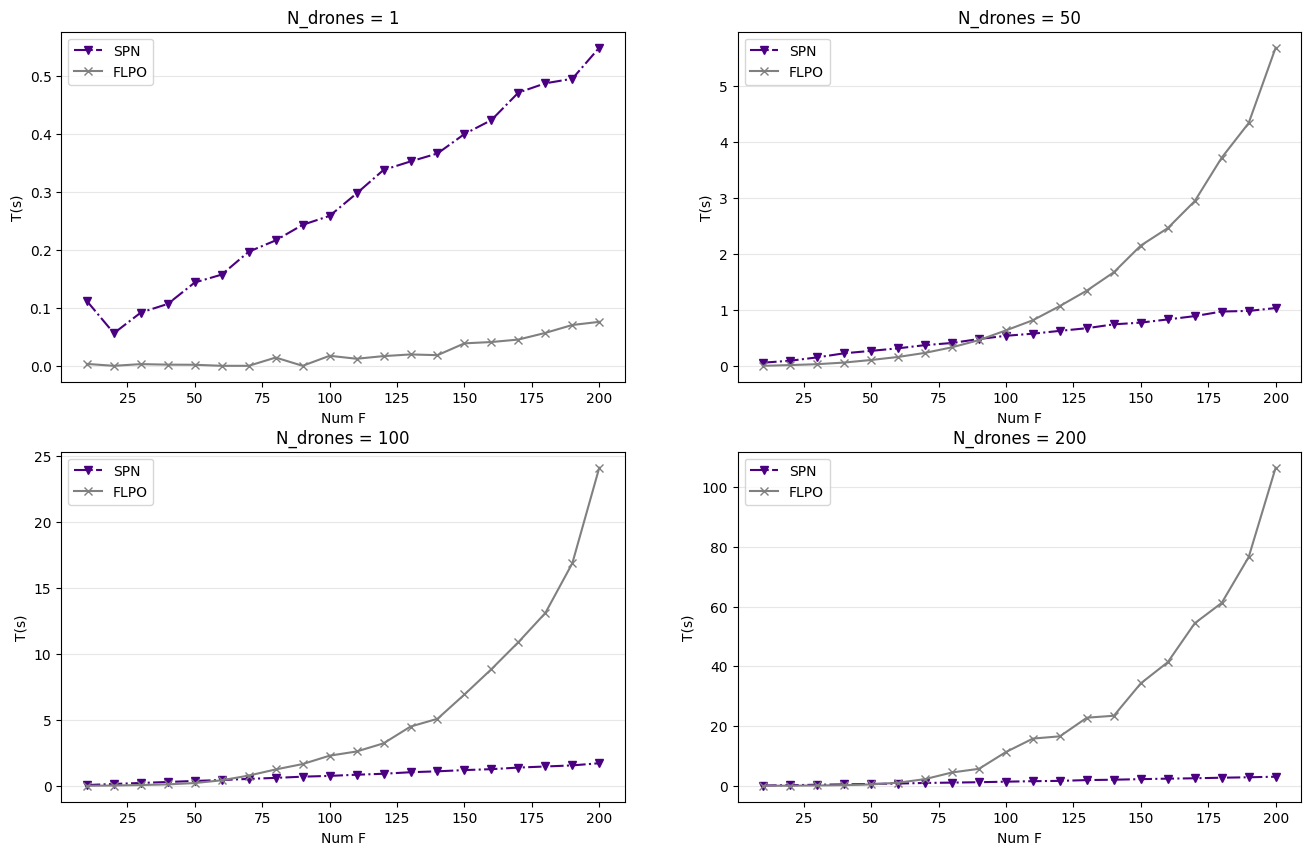

In [7]:
color1 = 'indigo'
color2 = 'gray'
color3 = 'orange'
linestyle1 = '-.'
linestyle2 = '-'
linestyle3 = '--'

plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.plot(num_facilities,times_1_L,linestyle1,marker='v',color=color1,label='SPN')
plt.plot(num_facilities,times_1_F,linestyle2,marker='x',color=color2,label='FLPO')
# plt.plot(num_facilities,times_1_G,linestyle3,marker='o',color=color3,label='FLPO_DP_1')
# plt.yscale('log')
plt.xlabel('Num F')
plt.ylabel('T(s)')
plt.title('N_drones = 1')
# plt.yticks(np.linspace(0,35,15))
plt.grid(axis='y',alpha=0.3)
plt.legend()

plt.subplot(2,2,2)
plt.plot(num_facilities,times_2_L,linestyle1,marker='v',color=color1,label='SPN')
plt.plot(num_facilities,times_2_F,linestyle2,marker='x',color=color2,label='FLPO')
# plt.plot(num_facilities,times_2_G,linestyle3,marker='o',color=color3,label='FLPO_DP')
# plt.yscale('log')
plt.xlabel('Num F')
plt.ylabel('T(s)')
plt.title('N_drones = 50')
# plt.yticks(np.linspace(0,35,15))
plt.grid(axis='y',alpha=0.3)
plt.legend()

plt.subplot(2,2,3)
plt.plot(num_facilities,times_3_L,linestyle1,marker='v',color=color1,label='SPN')
plt.plot(num_facilities,times_3_F,linestyle2,marker='x',color=color2,label='FLPO')
# plt.plot(num_facilities,times_3_G,linestyle3,marker='o',color=color3,label='FLPO_DP')
# plt.yscale('log')
plt.xlabel('Num F')
plt.ylabel('T(s)')
plt.title('N_drones = 100')
# plt.yticks(np.linspace(0,35,15))
plt.grid(axis='y',alpha=0.3)
plt.legend()

plt.subplot(2,2,4)
plt.plot(num_facilities,times_4_L,linestyle1,marker='v',color=color1,label='SPN')
plt.plot(num_facilities,times_4_F,linestyle2,marker='x',color=color2,label='FLPO')
# plt.plot(num_facilities,times_4_G,linestyle3,marker='o',color=color3,label='FLPO_DP')
# plt.yscale('log')
plt.xlabel('Num F')
plt.ylabel('T(s)')
plt.title('N_drones = 200')
# plt.yticks(np.linspace(0,35,15))
plt.grid(axis='y',alpha=0.3)
plt.legend()


# plt.plot(num_facilities,times_1_L,linestyle1,marker='v',color=color1,label='SPN_1')
# plt.plot(num_facilities,times_2_L,linestyle1,marker='o',color=color1,label='SPN_50')
# plt.plot(num_facilities,times_3_L,linestyle1,marker='^',color=color1,label='SPN_100')
# plt.plot(num_facilities,times_4_L,linestyle1,marker='x',color=color1,label='SPN_200')

# plt.plot(num_facilities,times_1_F,linestyle2,marker='v',color=color2,label='FLPO_1')
# plt.plot(num_facilities,times_2_F,linestyle2,marker='o',color=color2,label='FLPO_50')
# plt.plot(num_facilities,times_3_F,linestyle2,marker='^',color=color2,label='FLPO_100')
# plt.plot(num_facilities,times_4_F,linestyle2,marker='x',color=color2,label='FLPO_200')

# plt.plot(num_facilities,times_1_G,linestyle3,marker='v',color=color3,label='FLPO_DP_1')
# plt.plot(num_facilities,times_2_G,linestyle3,marker='o',color=color3,label='FLPO_DP_50')
# plt.plot(num_facilities,times_3_G,linestyle3,marker='^',color=color3,label='FLPO_DP_100')
# plt.plot(num_facilities,times_4_F,linestyle3,marker='x',color=color3,label='FLPO_DP_200')

# plt.legend()
# plt.title('GPU Runtime Comparison (Total Route)')
plt.savefig("SpeedTestResults.svg")

plt.show()
